#  Fitting Spectrum

This notebook shows the aplication of fitting code to a 5-component spectrum 


In [1]:
import matplotlib.pylab as plt
import tables as tb
from Histogram import Histogram as hist
from PDF import PDF
import numpy as np
from Fits import Fit
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
#Opening file and reading data
f = tb.open_file("../Data/data_spectrum.h5", "r")
E = f.root.E[:]
Co = f.root.Co[:]
K = f.root.K[:]
Tl = f.root.Tl[:]
Bi = f.root.Bi[:]
bb2n = f.root.bb2n[:]
testnn = f.root.testnn[:]
total = f.root.total[:]

In [3]:
#Creating histogram from traning spectra data
minE,maxE,nbin = 0.6,3.,125 #values not used
h_Co = hist([],nbin,minE,maxE)
h_Co.hist = Co
h_Co.bins = E
h_K = hist([], nbin,minE,maxE)
h_K.hist = K
h_K.bins = E
h_Tl = hist([],nbin,minE,maxE)
h_Tl.hist = Tl
h_Tl.bins = E
h_Bi = hist([],nbin,minE,maxE)
h_Bi.hist = Bi
h_Bi.bins = E
h_bb2n = hist([],nbin,minE,maxE)
h_bb2n.hist = bb2n
h_bb2n.bins = E
h_testnn = hist(testnn,nbin,minE,maxE)
h_testnn.hist = testnn
h_testnn.bins = E
h_total = hist(total,nbin,minE,maxE)
h_total.hist = total
h_total.bins = E

In [4]:
#Creating PDF from traning spectra histograms
interpol = 'cubic'
pdf_Co = PDF(h_Co,interpolation=interpol)
pdf_K = PDF(h_K,interpolation=interpol)
pdf_Tl = PDF(h_Tl,interpolation=interpol)
pdf_Bi = PDF(h_Bi,interpolation=interpol)
pdf_bb2n = PDF(h_bb2n,interpolation=interpol)
pdf_testnn = PDF(h_testnn,interpolation=interpol)
pdf_total = PDF(h_total,interpolation=interpol)

In [5]:
# Defining pdf list and initial parameter guess
pdflis = [pdf_Co,pdf_K,pdf_Tl,pdf_Bi,pdf_bb2n]
nevslist = np.array([150000,80000,15000,40000,20000])/8.

In [6]:
#Fit initialization
fit = Fit(E,h_total,pdflis)

In [7]:
%time res_ll = fit.FitLLM(nevslist,tol=1e-10,options={"maxiter":100000,'ftol':1e-20})
print(res_ll)

CPU times: user 1.95 s, sys: 12.1 ms, total: 1.96 s
Wall time: 1.74 s
          chi2: 1.7545517115556524
           err: array([ 321.84053591,  268.4997368 ,  107.99618617,  485.68737027,
        443.11965811])
 final_simplex: (array([[ 18395.0973629 ,  10041.57996118,   1992.7751794 ,   4838.85734773,
          1384.68928794],
       [ 18395.0973629 ,  10041.57996118,   1992.7751794 ,   4838.85734773,
          1384.68928794],
       [ 18395.0973629 ,  10041.57996118,   1992.7751794 ,   4838.85734773,
          1384.68928794],
       [ 18395.0973629 ,  10041.57996118,   1992.7751794 ,   4838.85734773,
          1384.68928794],
       [ 18395.0973629 ,  10041.57996118,   1992.7751794 ,   4838.85734773,
          1384.68928794],
       [ 18395.0973629 ,  10041.57996118,   1992.7751794 ,   4838.85734773,
          1384.68928794]]), array([ 715.13490661,  715.13490661,  715.13490661,  715.13490661,
        715.13490661,  715.13490661]))
           fun: 715.134906606767
       message: 'Op

In [8]:
%time res_ls = fit.FitLeastSQ(nevslist,tol=1e-12,options={"maxiter":1000})
print(res_ls)

CPU times: user 1.91 ms, sys: 68 µs, total: 1.98 ms
Wall time: 1.56 ms
(array([ 18967.83837951,  10149.60058375,   2634.76085786,   4478.6278918 ,
          540.68234686]), array([[  88605.78091829,    9618.72771011,   21445.75123705,
         -56920.40963888,  -69627.40166988],
       [   9618.72771011,   61723.65953073,   12471.17774559,
          -8206.41749624,  -74394.3966628 ],
       [  21445.75123705,   12471.17774559,  157620.51550422,
         -49809.16601798,  -96551.68701343],
       [ -56920.40963888,   -8206.41749624,  -49809.16601798,
          97414.7531629 ,   10152.12102751],
       [ -69627.40166988,  -74394.3966628 ,  -96551.68701343,
          10152.12102751,  228635.00881727]]))


# LL Profile

/home/brais/Documents/Next/Energy_spectrum/RootFreeVersion/Next_Energy/Code/Fits.py:11: RuntimeWarning: invalid value encountered in log
  return (-mu+x*np.log(mu+0.00001)-gammaln(x+1))


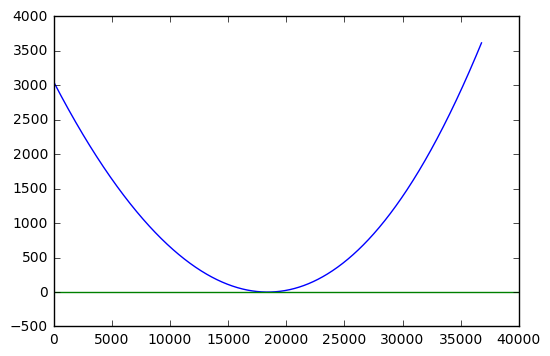

In [9]:
# Scan for component i=0 with npoints=1000 (LL min is subtructed)
scan = fit.FitLLMScan(np. array([ 18395.02927031,  10041.54032921,   1992.53167288,   4839.01680656,1384.77826122]),0,1000)
plt.plot(scan[0],np.array(scan[1])-1)
plt.plot([0,40000],[0,0])

(-1.1, 0.5)

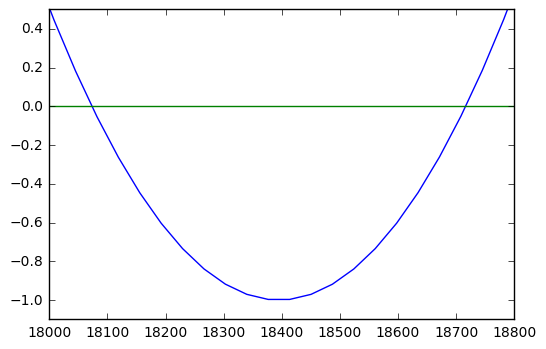

In [10]:
# LL profile - 1 gives the confidence interval, ploted here zoomed
plt.plot(scan[0],np.array(scan[1])-1)
plt.plot([0,40000],[0,0])
plt.xlim(18000,18800)
plt.ylim(-1.1,.5)

# Pulls

This is just to show how pulls are made, runnig this code with enough data takes a lot of time. You can find pull data for all variables an 10000 experiments in Pull_Plot notebook

In [ ]:
# Just creating an auxiliar copy for all histograms
nevslist = np.array([150000,80000,15000,40000,20000])/8
ne = np.array([0,0,0,0,0])
h_Coaux = hist([],nbin,minE,maxE)
h_Coaux.hist = Co/8.
ne[0] = h_Coaux.hist.sum()
h_Coaux.bins = E
h_Kaux = hist([], nbin,minE,maxE)
h_Kaux.hist = K/.8
ne[1] = h_Kaux.hist.sum()
h_Kaux.bins = E
h_Tlaux = hist([],nbin,minE,maxE)
h_Tlaux.hist = Tl/8.
ne[2] = h_Tlaux.hist.sum()
h_Tlaux.bins = E
h_Biaux = hist([],nbin,minE,maxE)
h_Biaux.hist = Bi/8.
ne[3] = h_Biaux.hist.sum()
h_Biaux.bins = E
h_bb2naux = hist([],nbin,minE,maxE)
h_bb2naux.hist = bb2n*2054/bb2n.sum()
ne[4] = h_bb2naux.hist.sum()
h_bb2naux.bins = E
print(nevslist,'\n',ne)

[ 18750.  10000.   1875.   5000.   2500.] 
 [18622 99495  1902  4786  2054]


In [ ]:
# Poisson smearing for data and pull computation (fitded-real)/error_fit

haux =  hist([], nbin,minE,maxE)
nevslist = np.array([150000,80000,15000,40000,20000])/8.
N_pull = 10
pull_list = np.zeros([N_pull,5])
ne_poiss = np.zeros([5])
for i in np.arange(N_pull):
    aux = np.random.poisson(h_Coaux.hist)
    ne_poiss[0] = aux.sum()
    haux.hist = aux
    aux = np.random.poisson(h_Kaux.hist)
    ne_poiss[1] = aux.sum()
    haux.hist += aux
    aux = np.random.poisson(h_Tlaux.hist)
    ne_poiss[2] = aux.sum()
    haux.hist += aux
    aux = np.random.poisson(h_Biaux.hist)
    ne_poiss[3] = aux.sum()
    haux.hist += aux
    aux = np.random.poisson(h_bb2naux.hist)
    ne_poiss[4] = aux.sum()
    haux.hist += aux

    fit = Fit(E,haux,pdflis)
    res = fit.FitLLM(ne)
    pull_list[i] = (res.x-ne_poiss)/res.err

# Plot

Run it to plot the fit spectrum results

In [ ]:
result = np.array([18395.02975447, 10041.5398816, 1992.53178756, 4839.01641257, 1384.7787113])

In [ ]:
interpol = 'nearest'
pdf_CoP = PDF(h_Co,factor=result[0],interpolation=interpol)
pdf_KP = PDF(h_K,factor=result[1],interpolation=interpol)
pdf_TlP = PDF(h_Tl,factor=result[2],interpolation=interpol)
pdf_BiP = PDF(h_Bi,factor=result[3],interpolation=interpol)
pdf_bb2nP = PDF(h_bb2n,factor=result[4],interpolation=interpol)



In [ ]:
Ep = np.linspace(0.6,2.8,1000)
aux =(E>0.6)&(E<2.8)
Ea = E[aux]
totala = total[aux]
testnna = testnn[aux]
y_CoP = pdf_CoP.pdf(Ep)
y_KP = pdf_KP.pdf(Ep)
y_TlP = pdf_TlP.pdf(Ep)
y_BiP = pdf_BiP.pdf(Ep)
y_bb2nP = pdf_bb2nP.pdf(Ep)
fittotal = y_CoP+y_KP+y_TlP+y_BiP+y_bb2nP
y_CoP[0]=0.00001
y_CoP[-1]=0.00001
y_KP[0]=0.00001
y_KP[-1]=0.00001
y_BiP[0]=0.00001
y_BiP[-1]=0.00001
y_TlP[0]=0.00001
y_TlP[-1]=0.00001


In [ ]:
alfa= 0.2
plt.semilogy()
plt.ylim(0.5,3e3)
plt.errorbar(Ea,totala,yerr=np.sqrt(totala),marker='.',elinewidth=1,
             linewidth=0,label='data',color='black')
plt.errorbar(Ea,testnna,yerr=np.sqrt(testnna),marker='.',elinewidth=1,
             linewidth=0,label='bb2n_data',color='m')
plt.plot(Ep,fittotal,label='fit')
plt.plot(Ep,y_bb2nP,label='bb2n_fit')
plt.fill_between(Ep,0,y_CoP,label='Co_fit',alpha=alfa,color='r')
plt.fill_between(Ep,0,y_KP,label='K_fit',alpha=alfa,color='g')
plt.fill_between(Ep,0,y_TlP,label='Tl_fit',alpha=alfa,color='y')
plt.fill_between(Ep,0,y_BiP,label='Bi_fit',alpha=alfa,color='b')
#plt.plot(E)
plt.gcf().set_size_inches(12,9)
plt.legend().get_frame().set_facecolor('0.95')
plt.xlabel('Energy (MeV)',fontsize=16)
plt.ylabel('Entries',fontsize=18)
plt.savefig('fitspectrum.pdf')

In [ ]:
alfa= 0.2
plt.semilogy()
plt.ylim(0.5,3e3)
plt.errorbar(Ea,totala,yerr=np.sqrt(totala),marker='.',elinewidth=1,
             linewidth=0,label='data',color='black')
plt.errorbar(Ea,testnna,yerr=np.sqrt(testnna),marker='.',elinewidth=1,
             linewidth=0,label='bb2n_data',color='m')
plt.plot(Ep,fittotal,label='fit')
plt.plot(Ep,y_bb2nP,label='bb2n_fit')
plt.fill_between(Ep,0,y_CoP,label='Co_fit',alpha=alfa,color='r')
plt.fill_between(Ep,0,y_KP,label='K_fit',alpha=alfa,color='g')
plt.fill_between(Ep,0,y_TlP,label='Tl_fit',alpha=alfa,color='y')
plt.fill_between(Ep,0,y_BiP,label='Bi_fit',alpha=alfa,color='b')
#plt.plot(E)

plt.gcf().set_size_inches(12,9)
plt.legend().get_frame().set_facecolor('0.95')
plt.xlabel('Energy (MeV)',fontsize=16)
plt.ylabel('Entries',fontsize=18)
plt.savefig('fitspectrum_log.pdf')

In [ ]:
alfa= 0.2
#plt.semilogy()
plt.ylim(0.5,3e3)
plt.errorbar(Ea,totala,yerr=np.sqrt(totala),marker='.',elinewidth=1,
             linewidth=0,label='data',color='black')
plt.errorbar(Ea,testnna,yerr=np.sqrt(testnna),marker='.',elinewidth=1,
             linewidth=0,label='bb2n_data',color='m')
plt.plot(Ep,fittotal,label='fit')
plt.plot(Ep,y_bb2nP,label='bb2n_fit')
plt.fill_between(Ep,0,y_CoP,label='Co_fit',alpha=alfa,color='r')
plt.fill_between(Ep,0,y_KP,label='K_fit',alpha=alfa,color='g')
plt.fill_between(Ep,0,y_TlP,label='Tl_fit',alpha=alfa,color='y')
plt.fill_between(Ep,0,y_BiP,label='Bi_fit',alpha=alfa,color='b')
#plt.plot(E)
plt.gcf().set_size_inches(12,9)
plt.legend().get_frame().set_facecolor('0.95')
plt.xlabel('Energy (MeV)',fontsize=16)
plt.ylabel('Entries',fontsize=18)
plt.savefig('fitspectrum.pdf')